## Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print('Libraries Imported!')

Libraries Imported!


In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries Imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Lib

## Data Extraction

In [3]:
df_data_1 = pd.read_csv("AB_NYC_2019.csv")
df_data_1.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


## Data Analysis

In [4]:
dfgroup = df_data_1.groupby('neighbourhood_group').count()['id']
dfgroup.head()


neighbourhood_group
Bronx              704
Brooklyn         15591
Manhattan        15928
Queens            3845
Staten Island      265
Name: id, dtype: int64

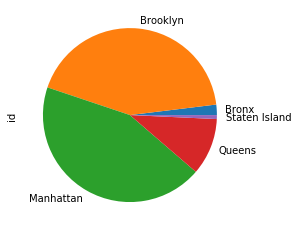

In [5]:
import matplotlib.pyplot as plt
dfgroup.plot(kind ='pie')
plt.show()

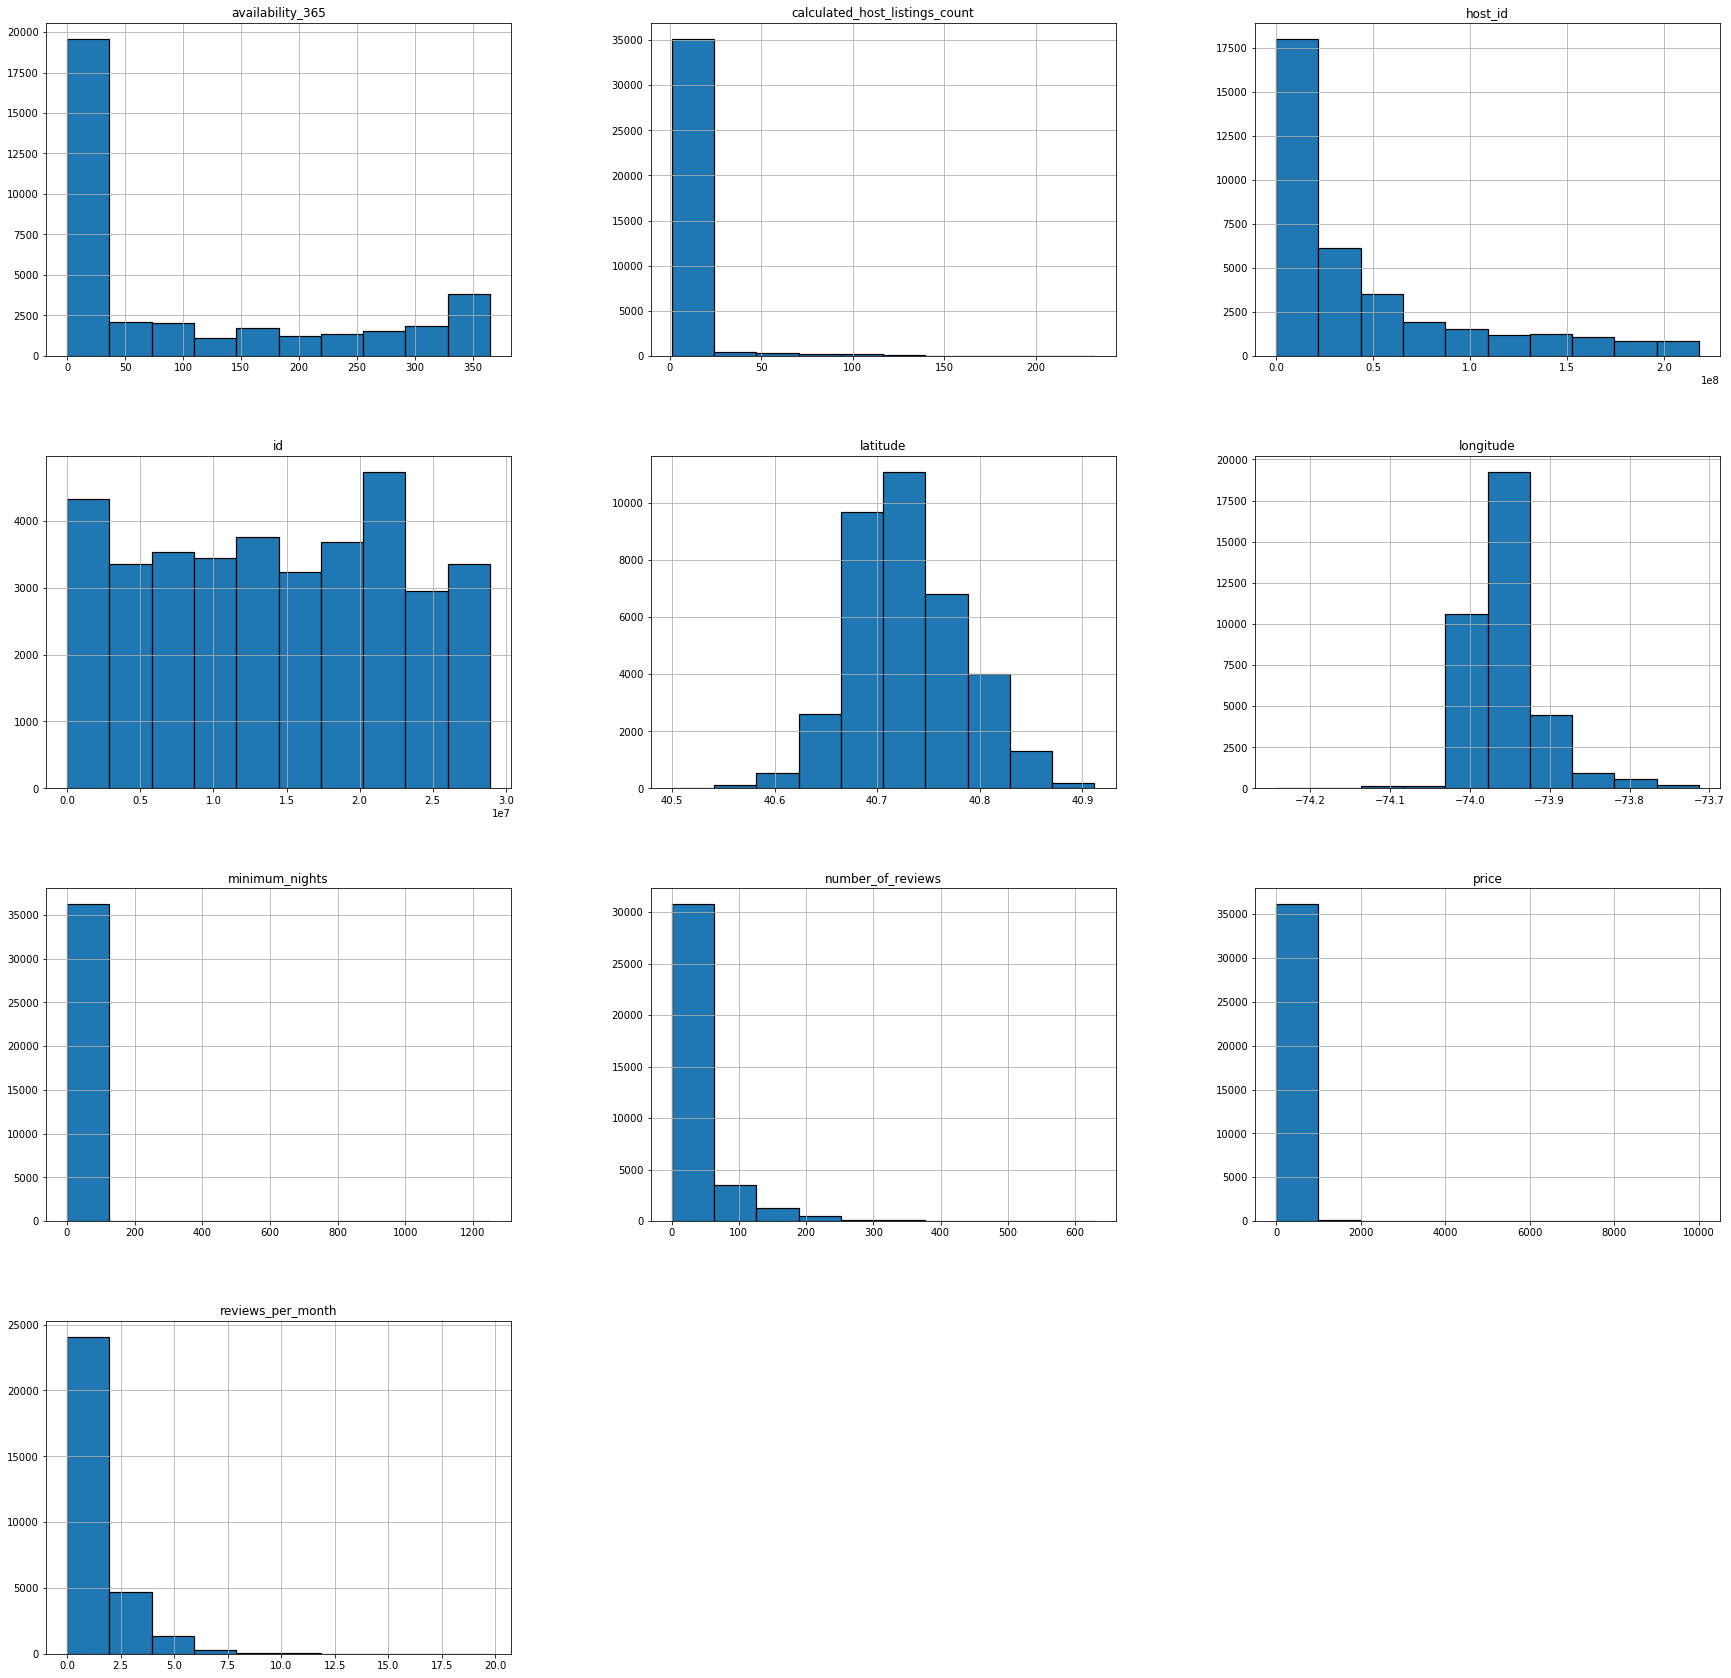

In [6]:
# Visualizing the distribution for every "feature"
df_data_1.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [7]:
df_data_1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.633400e+04,3.633400e+04,36333.000000,36333.000000,36333.000000,36333.000000,36333.000000,30532.000000,36333.000000,36333.000000
mean,1.422079e+07,4.471385e+07,40.728640,-73.953169,147.358022,6.905651,29.448793,1.142241,3.941761,101.593427
std,8.427656e+06,5.381382e+07,0.054364,0.044079,230.736064,21.098663,49.930208,1.480552,13.425832,129.733033
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,6.967039e+06,5.905590e+06,40.689100,-73.982400,69.000000,2.000000,1.000000,0.140000,1.000000,0.000000
50%,1.421927e+07,2.213123e+07,40.722280,-73.955970,105.000000,3.000000,8.000000,0.490000,1.000000,18.000000
75%,2.152909e+07,6.139196e+07,40.763490,-73.938240,170.000000,5.000000,35.000000,1.660000,2.000000,201.000000
max,2.891183e+07,2.179093e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,19.750000,232.000000,365.000000


## Places received high reviews from each neighbourhood group

In [33]:
df_data_1.iloc[df_data_1.groupby('neighbourhood_group')['number_of_reviews'].agg(pd.Series.idxmax)].sort_values(by='number_of_reviews', ascending=False)[['name','host_id','number_of_reviews','neighbourhood_group','neighbourhood','price','reviews_per_month','calculated_host_listings_count']]


,name,host_id,number_of_reviews,neighbourhood_group,neighbourhood,price,reviews_per_month,calculated_host_listings_count
11759,Room near JFK Queen Bed,47621202,629.0,Queens,Jamaica,47.0,14.58,2.0
2031,Great Bedroom in Manhattan,4734398,607.0,Manhattan,Harlem,49.0,7.75,3.0
4870,Private brownstone studio Brooklyn,12949460,488.0,Brooklyn,Park Slope,160.0,8.14,1.0
256,D Private Che@p Room 2 Explore NYC,303939,333.0,Staten Island,Tompkinsville,36.0,3.19,6.0
5260,Cozy Private Bedroom,19533769,321.0,Bronx,Mott Haven,53.0,5.46,1.0


## Filter Data in Queens Region

In [40]:
Condition = df_data_1['neighbourhood_group']=='Queens'
dfQueens = df_data_1[Condition]
dfQueens.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130.0,3.0,248.0,2019-07-01,2.25,1.0,215.0
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70.0,30.0,25.0,2019-05-31,0.22,1.0,324.0
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140.0,2.0,1.0,2011-09-19,0.01,1.0,1.0
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79.0,30.0,28.0,2019-04-12,0.26,1.0,126.0
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350.0,8.0,10.0,2019-05-12,0.11,5.0,365.0


## Number of Reviews vs Price

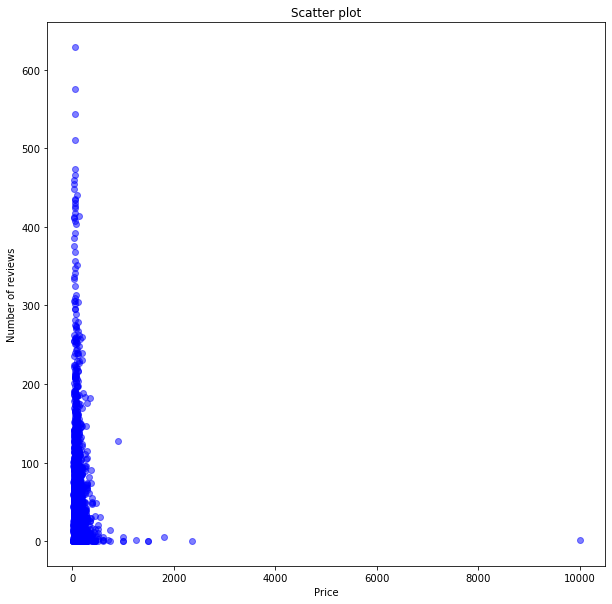

In [10]:

# Create data
N = 500
x = dfQueens['price']
y = dfQueens['number_of_reviews']

# Plot
plt.figure(figsize=(10,10))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

## Choropleth map to show expensive areas

In [25]:
address = 'NewYork City, NYC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.710314600000004, -74.00496498730675.


In [45]:
state_geo = 'https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson' # geojson file

# create a plain world map
state_map =folium.Map(location=[latitude, longitude], zoom_start=11)

state_map.choropleth(
    geo_data=state_geo,
    data=dfQueens,
    columns=['neighbourhood','price'],
    key_on='feature.properties.PO_NAME',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Price in Queen neighbourhood'
)

# display map
state_map

In [35]:
#Room near JFK Queen Bed
condition = dfQueens['host_id']==47621202
dffilter = dfQueens[condition]
dffilter.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47.0,1.0,629.0,2019-07-05,14.58,2.0,333.0
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47.0,1.0,576.0,2019-06-27,13.40,2.0,173.0


In [46]:
dfQueens.sort_values(by='number_of_reviews', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47.0,1.0,629.0,2019-07-05,14.58,2.0,333.0
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47.0,1.0,576.0,2019-06-27,13.40,2.0,173.0
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46.0,1.0,543.0,2019-07-01,11.59,5.0,163.0
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48.0,1.0,510.0,2019-07-06,16.22,5.0,341.0
1271,546383,My Little Guest Room in Flushing,2680820,Linda,Queens,Flushing,40.75578,-73.81948,Private room,55.0,1.0,474.0,2019-05-25,5.53,3.0,332.0


In [47]:
dfQueens.sort_values(by='price', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000.0,100.0,2.0,2016-02-13,0.04,1.0,0.0
17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350.0,365.0,0.0,NaN,NaN,1.0,364.0
14380,11234747,Mins away to Manhattan Suite Residence,24146326,Julien,Queens,Astoria,40.76626,-73.93054,Shared room,1800.0,3.0,5.0,2017-04-09,0.13,2.0,90.0
23865,19261720,Oceanfront vacation home on Rockaway Beach,6988611,Jill,Queens,Arverne,40.58781,-73.79317,Entire home/apt,1500.0,3.0,0.0,NaN,NaN,1.0,342.0
23396,18935359,Magnificent Lakeview Home on Kissena Park in NYC,23234988,Ann,Queens,Flushing,40.74982,-73.80610,Entire home/apt,1500.0,3.0,0.0,NaN,NaN,6.0,256.0


In [48]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.1               |   py36h8328e55_0         654 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1009 KB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.1-py36h8328e55_0
  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



pil

In [50]:
max_words = 90
word_string = ''
for name in dfQueens.name:
    word_string = word_string + ((name + ' '))
                                     
# display the generated text
word_string

'1 Stop fr. Manhattan! Private Suite,Landmark Block Little King of Queens Fully Furnished Basement Apartment A room w/ a Manhattan view, longer stay Beautiful Queens Brownstone! - 5BR ( F) Excellent/Pvt Rm cozy studio with parking spot Clean and convenient 2BR apartment 3 floors of luxury! Elegant NYC Pad Nice, clean, safe, convenient 3BR Safe cute near subway& Manhattan NY NY retro style One Bedroom Mini studio - Free WIFI Modern, Safe, Clean, Bright Room in Astoria for 2 Bienvenue Oceanfront Apartment in Rockaway 1 BDRM Apt-Weekend Sublease Forest Hills Apt minutes to midtown Manhattan Astoria-Private Home NYC- Female Only Clean15min to Manhattan Sunny 15min to Manhattan LADY only Lady only Curtain-divided room Ultra Modern NYC Garden Apartment Modern Garden Apartment in NYC Spacious, Kid-Friendly, and 15-20 Mins. to Midtown Sunnyside NYC/ AC room/ city views/ near Midtown Modern Unique Studio in NYC rooms for rent in Queens with piano Private Room With GREAT Location Astoria Garden 

In [57]:
stopwords = set(STOPWORDS)
stopwords.add('Apartment')
stopwords.add('Queen')
stopwords.add('room')
# create the word cloud
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(word_string)

print('Word cloud created!')

Word cloud created!


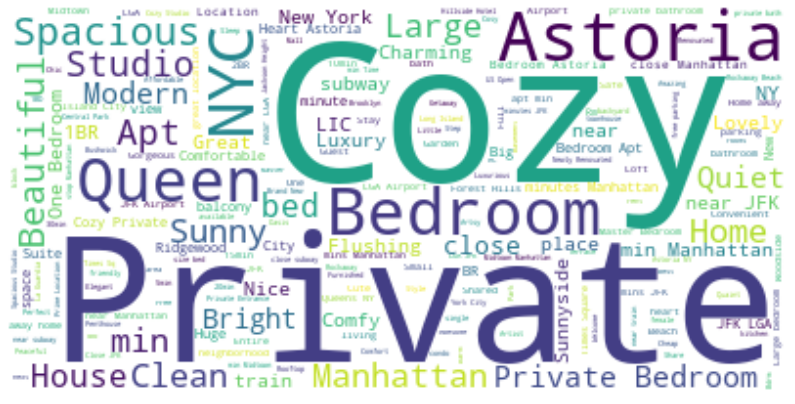

In [58]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Insights

1. Room near JFK Queen Bed is better place with high number of reviews and less price.
2. Furnished room in Astoria apartment is highly expensive place in Queens nighbourhood group.
3. Price and number of views are related. Less expensive places got many reviews when compared to high expensive. Scatter plot explains the fact.

## Interesting places to visit 